# EDA

## 1. Import data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/P5clean.csv')

## 2. Exploring the happiness (life-ladder)

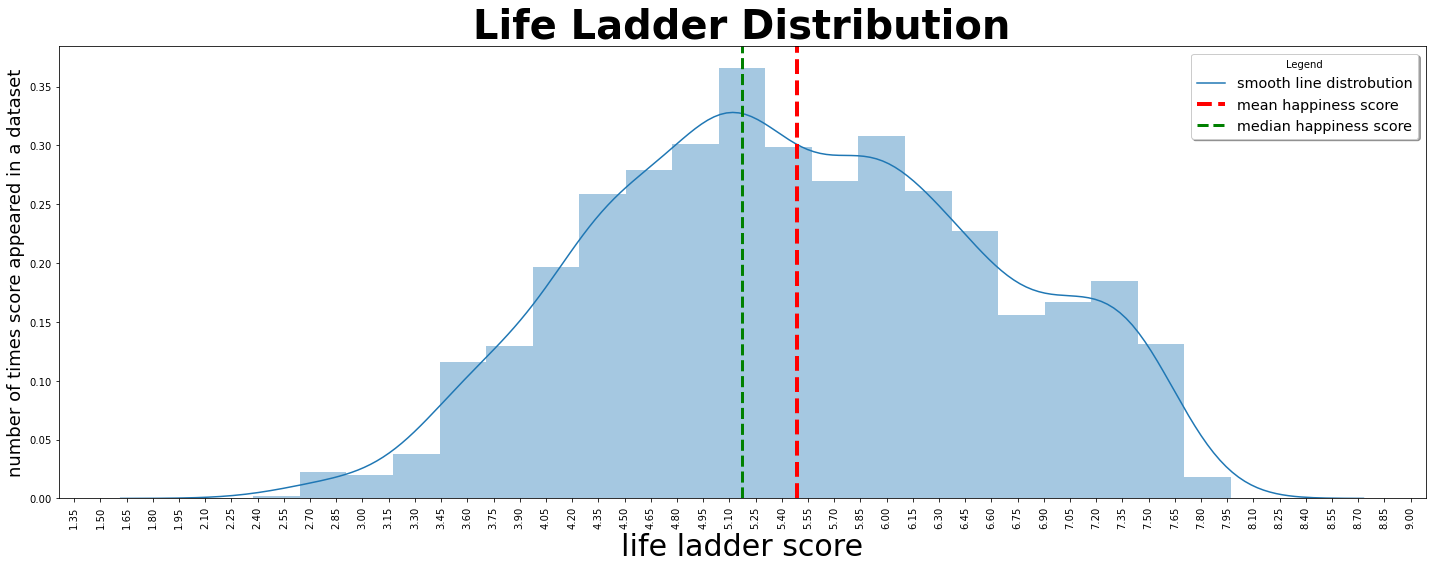

In [3]:
plt.figure(figsize = (20,8))

sns.distplot(df.life_ladder)    

# score numbers
plt.xticks(rotation=90)
plt.axes().get_xaxis().set_major_locator(plt.MaxNLocator(70))

#labels
plt.ylabel('number of times score appeared in a dataset', fontsize = 18)
plt.xlabel('life ladder score', fontsize = 30)
plt.title('Life Ladder Distribution',fontweight = 'bold',fontsize = 40)

#vertical lines
plt.axvline(x = 5.49, color='r', linestyle='dashed', linewidth=4)
plt.axvline(x = 5.17, color='g', linestyle='dashed', linewidth=3)

#legend
plt.legend(['smooth line distrobution','mean happiness score','median happiness score'],title = 'Legend',fontsize='x-large', shadow = True)

plt.tight_layout()
plt.show();

In [4]:
# Description in numbers

df.life_ladder.describe()

count    1682.000000
mean        5.491012
std         1.117805
min         2.375000
25%         4.656750
50%         5.440000
75%         6.316750
max         7.971000
Name: life_ladder, dtype: float64

The graph and distribution table show that happiness has a skew towards the positive side

## 2. Happiness and other features

In [5]:
econ_life_ladder = ['life_ladder', 'overall_score', 'property_rights', 'government_integrity',
       'tax_burden', 'government_spending', 'business_freedom',
       'labor_freedom', 'monetary_freedom', 'trade_freedom',
       'investment_freedom', 'financial_freedom']
happiness_features = ['log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth', 'choice_freedom',
       'generosity', 'perceptions_of_corruption', 'positive_affect',
       'negative_affect', 'country_name', 'life_ladder']

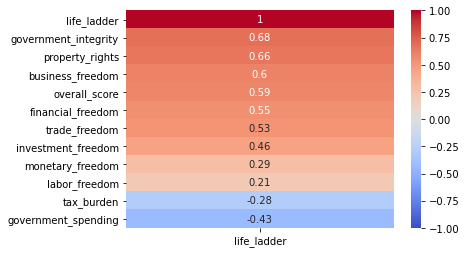

In [6]:
# Econ --> life ladder correlation
sns.heatmap(df[econ_life_ladder].corr()[['life_ladder']].sort_values('life_ladder', ascending=False), annot=True, cmap ='coolwarm', vmin=-1, vmax=1);


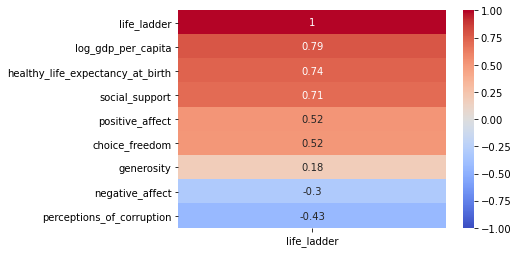

In [7]:
# Happiness --> life ladder correlation
sns.heatmap(df[happiness_features].corr()[['life_ladder']].sort_values('life_ladder', ascending=False), annot=True, cmap ='coolwarm', vmin=-1, vmax=1);

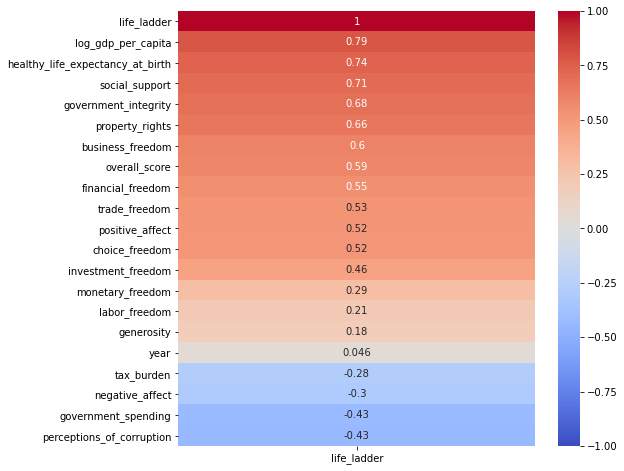

In [8]:
# Correlations

plt.figure(figsize =(8,8))

sns.heatmap(df.corr()[['life_ladder']].sort_values('life_ladder', ascending=False), annot=True, cmap ='coolwarm', vmin=-1, vmax=1);


## 3. Correlations between happiness and best feautures

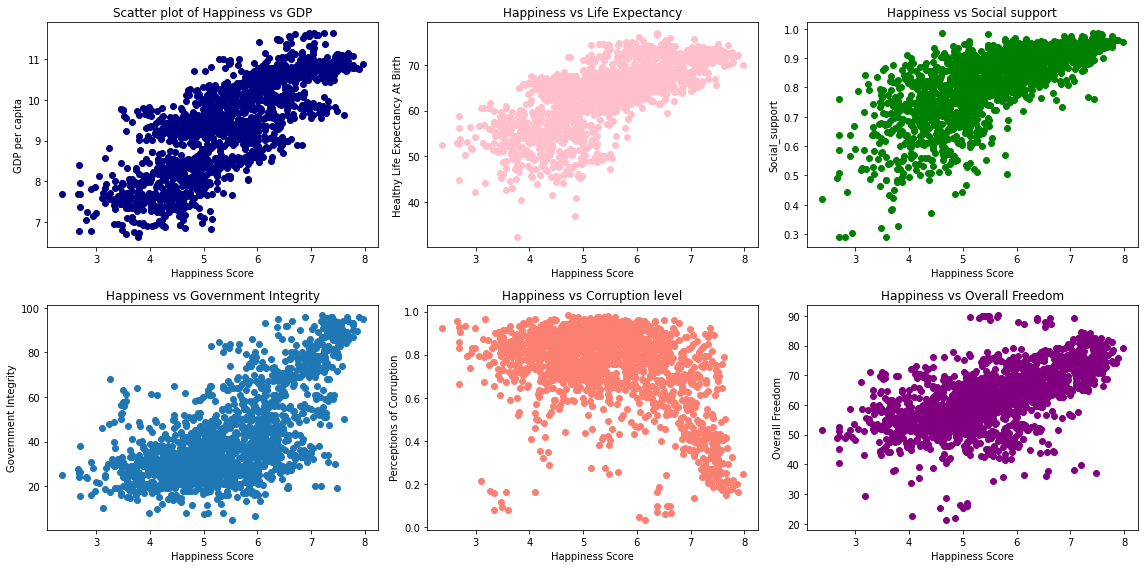

In [9]:
# Happiness and other features

fig, ax = plt.subplots(2, 3, figsize = (16, 8))

# scatterplot 1
ax[0][0].scatter(df.life_ladder, df.log_gdp_per_capita,color = 'navy')
ax[0][0].set_title('Scatter plot of Happiness vs GDP')
ax[0][0].set_xlabel('Happiness Score')
ax[0][0].set_ylabel('GDP per capita')

# scatterplot 2
ax[0][1].scatter(df.life_ladder, df.healthy_life_expectancy_at_birth,color='pink')
ax[0][1].set_title('Happiness vs Life Expectancy')
ax[0][1].set_xlabel('Happiness Score')
ax[0][1].set_ylabel('Healthy Life Expectancy At Birth')

# scatterplot 3
ax[0][2].scatter(df.life_ladder, df.social_support, color = 'green')
ax[0][2].set_title('Happiness vs Social support')
ax[0][2].set_xlabel('Happiness Score')
ax[0][2].set_ylabel('Social_support')

# scatterplot 4
ax[1][0].scatter(df.life_ladder, df.government_integrity)
ax[1][0].set_title('Happiness vs Government Integrity')
ax[1][0].set_xlabel('Happiness Score')
ax[1][0].set_ylabel('Government Integrity')

# scatterplot 5
ax[1][1].scatter(df.life_ladder, df.perceptions_of_corruption, color = 'salmon')
ax[1][1].set_title('Happiness vs Corruption level')
ax[1][1].set_xlabel('Happiness Score')
ax[1][1].set_ylabel('Perceptions of Corruption')

# scatterplot 6
ax[1][2].scatter(df.life_ladder, df.overall_score, color = 'purple')
ax[1][2].set_title('Happiness vs Overall Freedom')
ax[1][2].set_xlabel('Happiness Score')
ax[1][2].set_ylabel('Overall Freedom')

plt.tight_layout();

## 4. Level of happiness in countries

In [10]:
# Since we will compare different parameters, we've decided to group our dataframe by countries and their average scores
# Also, all countries would be listed by their happiness scores
# Now, we will have  different 158 countries

grouped = df.groupby('country_name', as_index =False).mean().sort_values('life_ladder', ascending=False).reset_index(drop=True)

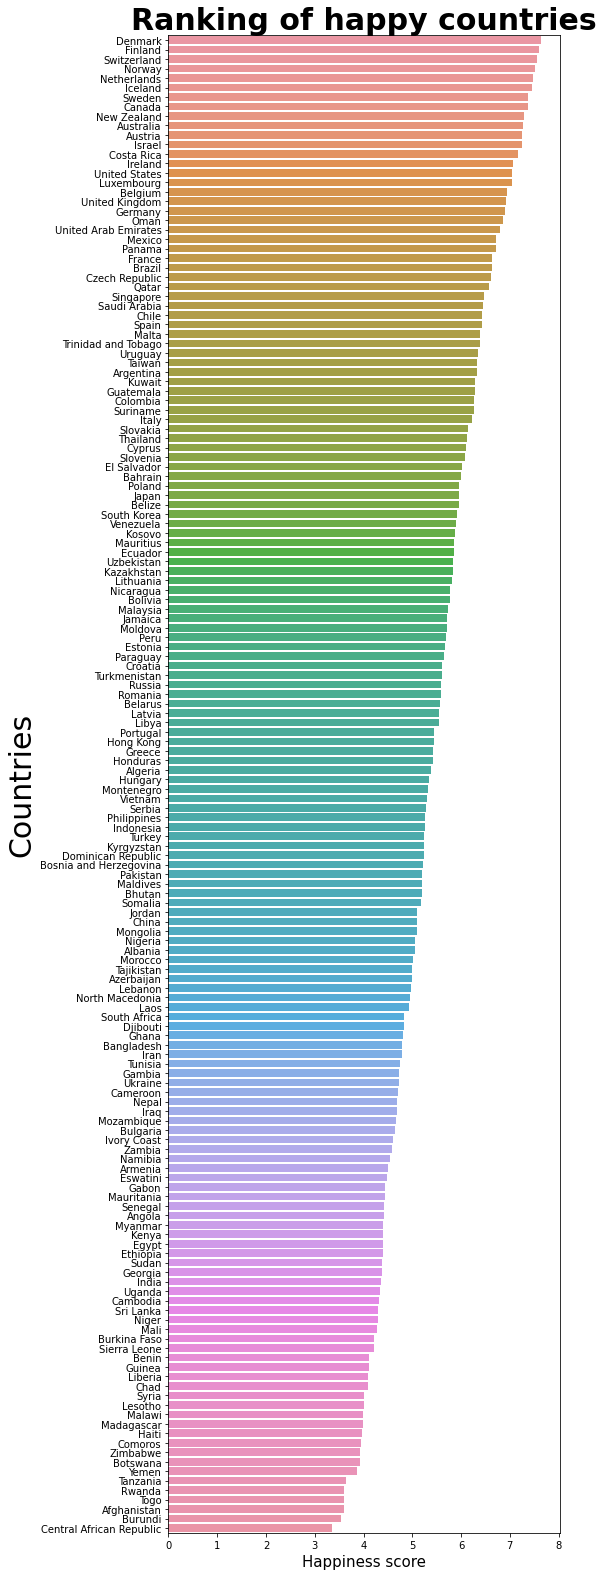

In [11]:
# Let's see it on a graph

plt.figure(figsize=(8,22))

sns.barplot(x= grouped.life_ladder, y= grouped.country_name)
plt.title('Ranking of happy countries',fontweight = 'bold',fontsize = 30)
plt.xlabel('Happiness score', fontsize = 15)
plt.ylabel('Countries', fontsize = 30)

plt.tight_layout()
plt.show();

## 5. More specific correlations between happiness and best features

In [12]:
# Relationship between coutries GDP Per Capita and Life Ladder score, sorted by the difference
gdpPerCap_df = pd.DataFrame(data=df.groupby('country_name')[['log_gdp_per_capita', 'life_ladder']].mean())
gdpPerCap_df['difference'] = gdpPerCap_df['log_gdp_per_capita'] - gdpPerCap_df['life_ladder']
gdpPerCap_df.sort_values('difference', ascending=False, inplace=True)
gdpPerCap_df
# gdpPerCap_df[['difference']].style.background_gradient(cmap='PuBu').highlight_null('white')

,log_gdp_per_capita,life_ladder,difference
country_name,,,
Botswana,9.695727,3.928818,5.766909
Hong Kong,10.914252,5.440700,5.473552
Bulgaria,9.894545,4.640455,5.254091
Gabon,9.624556,4.435222,5.189333
Georgia,9.384923,4.372923,5.012000
...,...,...,...
Niger,7.002167,4.295417,2.706750
Guatemala,8.969583,6.276167,2.693417
Costa Rica,9.766083,7.166417,2.599667


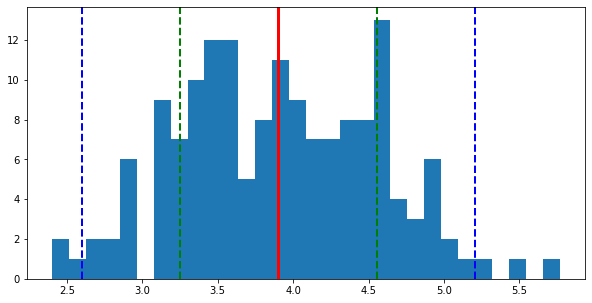

In [13]:
#histogram of the relationship
#shows that the majority of countries have a 'GDP Per Capita --> happiness' relationship within
#2 standard deviations of the mean... however there are a few that fall outside
mean = gdpPerCap_df['difference'].mean()
std1 = np.std(gdpPerCap_df['difference'])
std2 = np.std(gdpPerCap_df['difference']) * 2

plt.figure(figsize=(10,5))
plt.hist(gdpPerCap_df['difference'], bins=30)
plt.axvline(mean, color='r', linewidth=3)
plt.axvline(mean + std1, color='g', linestyle='dashed', linewidth=2)
plt.axvline(mean - std1, color='g', linestyle='dashed', linewidth=2)
plt.axvline(mean + std2, color='b', linestyle='dashed', linewidth=2)
plt.axvline(mean - std2, color='b', linestyle='dashed', linewidth=2)

In [14]:
#List of richest countries. GDP is country's GDP(income)/population

grouped[['country_name', 'log_gdp_per_capita']].sort_values('log_gdp_per_capita', ascending=False).head(10)

,country_name,log_gdp_per_capita
15,Luxembourg,11.607091
26,Qatar,11.507600
27,Singapore,11.354273
2,Switzerland,11.100444
13,Ireland,11.072000
3,Norway,11.040000
20,United Arab Emirates,11.034083
14,United States,10.960308
36,Kuwait,10.949500
74,Hong Kong,10.914252


In [15]:
# List of healthy countries from 2008-2020

grouped[['country_name','healthy_life_expectancy_at_birth']].sort_values('healthy_life_expectancy_at_birth', ascending=False).head(10)

,country_name,healthy_life_expectancy_at_birth
27,Singapore,75.650909
48,Japan,74.441538
74,Hong Kong,74.376680
30,Spain,73.550769
2,Switzerland,73.533333
40,Italy,73.112308
43,Cyprus,73.096667
23,France,73.004615
9,Australia,72.881667
7,Canada,72.881538


In [16]:
#  Average life expectamcy is 63.83 years
df['healthy_life_expectancy_at_birth'].mean()

63.83469839476812

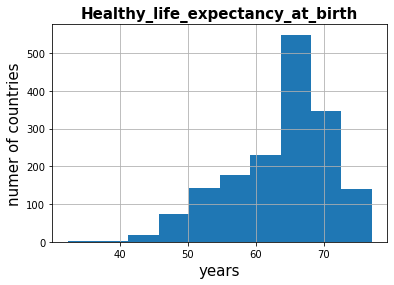

In [17]:
# Histogram of healthy countries

df['healthy_life_expectancy_at_birth'].hist()
plt.title('Healthy_life_expectancy_at_birth', fontsize=15, fontweight='bold')
plt.xlabel('years', fontsize = 15)
plt.ylabel('numer of countries', fontsize=15);

In [18]:
# Corruption

grouped[['country_name','perceptions_of_corruption']].sort_values('perceptions_of_corruption', ascending=True).head(10)

,country_name,perceptions_of_corruption
27,Singapore,0.100909
153,Rwanda,0.175727
0,Denmark,0.197231
1,Finland,0.258750
6,Sweden,0.260692
8,New Zealand,0.267333
2,Switzerland,0.294556
3,Norway,0.338333
74,Hong Kong,0.348100
15,Luxembourg,0.377182


In [19]:
# social support

grouped[['country_name','social_support']].sort_values('social_support', ascending=False).head(10)

,country_name,social_support
5,Iceland,0.977500
13,Ireland,0.959462
0,Denmark,0.956231
8,New Zealand,0.952333
3,Norway,0.949556
1,Finland,0.947667
9,Australia,0.944167
2,Switzerland,0.942778
17,United Kingdom,0.940846
30,Spain,0.936923


In [20]:
# Government integrity

grouped[['country_name','government_integrity']].sort_values('government_integrity', ascending=False).head(10)

,country_name,government_integrity
8,New Zealand,93.600000
1,Finland,91.733333
0,Denmark,91.269231
6,Sweden,91.000000
27,Singapore,90.827273
3,Norway,89.322222
4,Netherlands,87.241667
2,Switzerland,86.366667
7,Canada,85.115385
9,Australia,83.841667


In [21]:
# Economic freedom

grouped[['country_name','overall_score']].sort_values('overall_score', ascending=True).head(10)

,country_name,overall_score
149,Zimbabwe,33.338462
51,Venezuela,33.930769
72,Libya,42.731167
67,Turkmenistan,44.260000
107,Iran,45.445455
142,Chad,46.916667
124,Angola,46.975000
59,Bolivia,47.976923
148,Comoros,48.216667
125,Myanmar,48.222222


**Based on our research, we can tell:**
- although it is difficult to compare GDP of small and large countries, it is possible to tell that all 10 happiest countries are in top 23-30 richest countries 
- 8 happiest countries are in top 20 healthy life expectancy countries.Average life expectamcy is 63.83 years
- corruption is a good indicator of happiness.But, we need to understand it better. For example, Rwanda (Rwanda is an authoritarian country ruled by a politician who is a mass murderer, has lust for power and dictatorship. Anybody who has the capacity to question him disappear under incomprehensible circumstances. Rwanda is full of official thieves, official crooks ,official scammers sucking the blood of the common people)
- social support and government integrity are number one indicator of happiness, at least 7-9 happiest countries are in top 10 social support and government integrity countries.
- overall freedom is a good indicator of happiness, but it is a sum score of all freedom indicators and more research needs to be done here. There are many countries with freedom score less than %50 but in top happiest countries. For example, Venezuela, Uzekistan, Brazil, Argentina. Venezuela is listed as 2nd worst country by freedom, but 51st place in happiness. But, level of happiness in this country drooped almost in 2 times from 2010

## 6. US happiness over the years

In [22]:
# Create a 'country' variable
country = 'United States'
country_df = df[df['country_name'] == country]

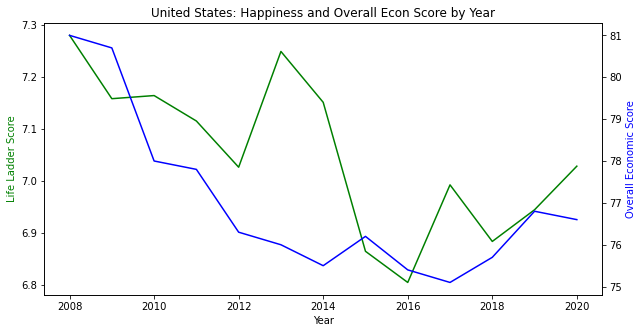

In [23]:
x=country_df['year']
y1=country_df['life_ladder']
y2=country_df['overall_score']

# plotting figures by creating aexs object
# using subplots() function
fig, ax = plt.subplots(figsize = (10, 5))
plt.title(f'{country}: Happiness and Overall Econ Score by Year')

# using the twinx() for creating another
# axes object for secondary y-Axis
ax2 = ax.twinx()
ax.plot(x, y1, color = 'g')
ax2.plot(x, y2, color = 'b')

# giving labels to the axises
ax.set_xlabel('Year')
ax.set_ylabel('Life Ladder Score', color = 'g')
 
# secondary y-axis label
ax2.set_ylabel('Overall Economic Score', color = 'b')
 
# defining display layout
# plt.tight_layout()

# show plot
plt.show()

#source: https://www.geeksforgeeks.org/how-to-add-a-y-axis-label-to-the-secondary-y-axis-in-matplotlib/

## 7. Look for outliers

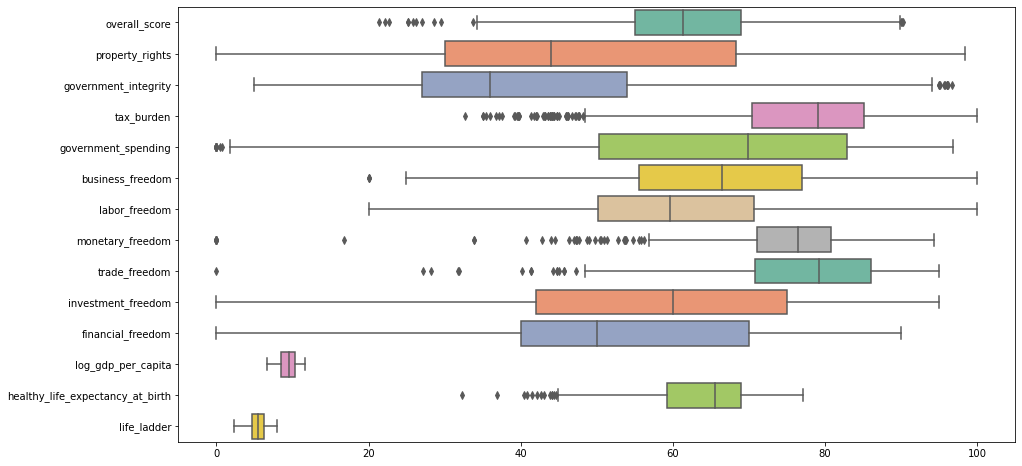

In [24]:
# Outliers. These distributions are not grouped by years and countries. Every country could have multiple years 

plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns = ['year', 'social_support', 'choice_freedom', 'generosity',
                                    'perceptions_of_corruption', 'positive_affect', 'negative_affect']),
                                    orient="h", palette="Set2");
plt.savefig('./assets/outliers.png')

In [25]:
# Find countries with outliers features:
# Example: healthy_life_expectancy_at_birth

df[['country_name','healthy_life_expectancy_at_birth','year']].sort_values('healthy_life_expectancy_at_birth', ascending=True).head(5)

,country_name,healthy_life_expectancy_at_birth,year
1388,Haiti,32.300,2010.0
1254,Haiti,36.860,2011.0
1611,Haiti,40.380,2008.0
1244,Eswatini,40.808,2011.0
1115,Haiti,41.420,2012.0


## 8. Distributions within one column

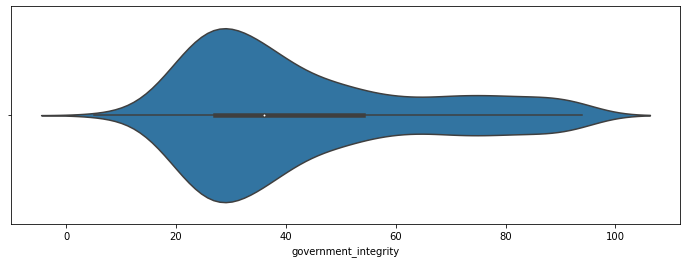

In [26]:
# Example: government_integrity
plt.figure(figsize=(12, 4))

sns.violinplot(df['government_integrity'])
plt.savefig('./assets/dist_govt_integrity.png');


***Some additioal thoughts for future projects:***
 - after exploring how level of happiness was distributed from one year to another, we had a lot of questions how the data was collected from country to country. Who asked questions and who answered them? How many people were asked in percentages? If we see a sharp increase or decrease in level of happiness, we need dig deeper to look what happened in general in particular country this year. Some countries had wars or unplanned government changes and it might affect scores. Also, more research could be done how different types of freedom affected particular countries and it could be achived by changing some parameters of our plots and charts.